121.93584
68.38902
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 32, 32)        1792      
_________________________________________________________________
batch_normalization_23 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 32, 32)        36928     
_________________________________________________________________
batch_normalization_24 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None,

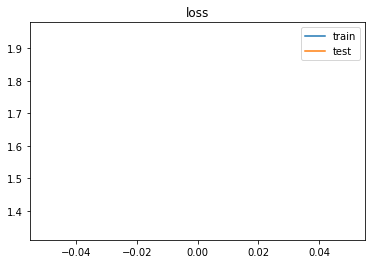

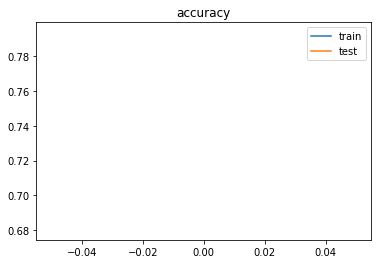

In [3]:
import numpy as np
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
K.common.set_image_dim_ordering('th')
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from getdatasets import getCifar100Data
from cifar100_model import cifar100_model
from utilities import cifar100_augment
from keras.optimizers import Adam
import matplotlib.pyplot as plt

def train_cifar100(x_train, y_train, x_test, y_test,augmentData, model):
  batch_size = 128
  maxepoches = 250
  learning_rate = 0.1
  lr_decay = 1e-6
  lrf = learning_rate
  sgd = SGD(lr=lrf, decay=lr_decay, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
  for epoch in range(1,150):

    if epoch%25==0 and epoch>0:
        lrf/=2
        sgd = SGD(lr=lrf, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    trainingResult = model.fit_generator(augmentData.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epoch, verbose=1,validation_data=(x_test, y_test),initial_epoch=epoch-1)
  return trainingResult

def evaluate_cifar100(x_test, y_test, model):
  scores = model.evaluate(x_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  return scores 

if __name__ == '__main__':
  x_train, y_train, x_test, y_test = getCifar100Data()
  num_classes = y_test.shape[1]
  model = cifar100_model(num_classes)
  model.summary()
  augmentData = cifar100_augment(x_train)
  trainingResult= train_cifar100(x_train, y_train, x_test, y_test,augmentData, model)
  testResult = evaluate_cifar100(x_test, y_test, model)
  plt.plot(trainingResult.history['loss'])
  plt.plot(trainingResult.history['val_loss'])
  plt.legend(['train','test'])
  plt.title('loss')
  plt.figure()
  plt.plot(trainingResult.history['acc'])
  plt.plot(trainingResult.history['val_acc'])
  plt.legend(['train','test'])
  plt.title('accuracy')